In [1]:
import re
import numpy as np
from matplotlib import pyplot as plt
import cmasher as cmr
from scipy.stats import gaussian_kde
from scipy import stats

In [2]:
inf=open('Data/threeplanetsystemsinfo.csv','r')
lines=inf.readlines()
multis=[]
for line in lines:
    if line==lines[0]:
        colname=re.split(',',line) #Sheet column names
    else:
        div=re.split(',',line)
        multis.append(div)

inf.close()

In [3]:
gapcompl=[float(i[colname.index('gapc')]) for i in multis]
gini=[float(i[colname.index('gini')]) for i in multis]
stdr=[float(i[colname.index('stdr')]) for i in multis]
normstdr=[float(i[colname.index('normstdr')]) for i in multis]
qdisr=[float(i[colname.index('qdispr')]) for i in multis]
qdisp=[float(i[colname.index('qdisp')]) for i in multis]
zeta=[float(i[colname.index('meanzeta')]) for i in multis]
subnep=[float(i[colname.index('subnep')]) for i in multis]
supearth=[float(i[colname.index('supearth')]) for i in multis]
#zetas=[list(map(float, i[colname.index('zeta')].strip('[]').split())) for i in multis]
#rrats=[list(map(float, i[colname.index('rrat')].strip('[]').split())) for i in multis]
#meanrrat=[float(i[colname.index('meanrrat')]) for i in multis]

In [4]:
radii=[list(map(float, i[colname.index('radius')].strip('[]').split())) for i in multis]

Text(0, 0.5, 'Frequency')

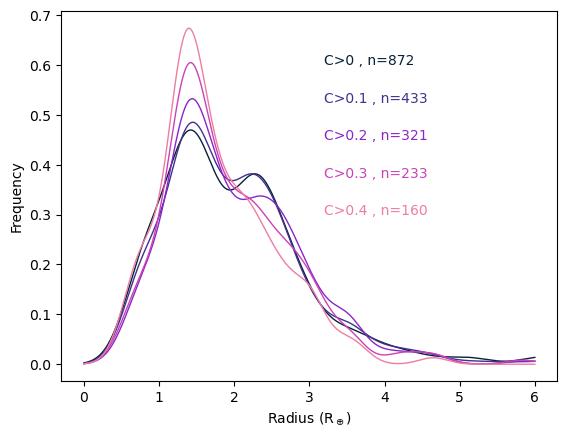

In [5]:
cmap = plt.get_cmap('cmr.bubblegum')
Clim=[0,0.10,0.20,0.30,0.4]
for ci in range(len(Clim)):
    trad=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            for j in radii[i]:
                trad.append(j)
    kde=gaussian_kde(trad,bw_method=0.14)
    points=np.linspace(0,6,6000)
    plt.plot(points,kde(points),color=cmap((Clim[ci])*2),lw=1.0)
    plt.text(3.2,0.6-(ci*0.075),'C>'+str(Clim[ci])+' , n='+str(len(trad)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'Radius (R$_\oplus$)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

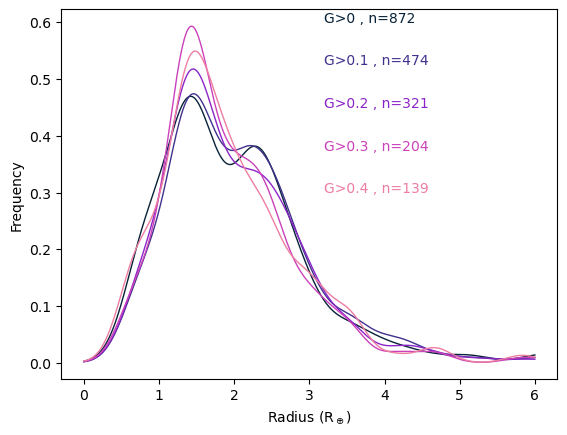

In [6]:
cmap = plt.get_cmap('cmr.bubblegum')
Clim=[0,0.10,0.20,0.30,0.4]
for ci in range(len(Clim)):
    trad=[]
    for i in range(len(gini)):
        if gini[i]>Clim[ci]:
            for j in radii[i]:
                trad.append(j)
    kde=gaussian_kde(trad,bw_method=0.14)
    points=np.linspace(0,6,6000)
    plt.plot(points,kde(points),color=cmap((Clim[ci])*2),lw=1.0)
    plt.text(3.2,0.6-(ci*0.075),'G>'+str(Clim[ci])+' , n='+str(len(trad)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'Radius (R$_\oplus$)')
plt.ylabel('Frequency')

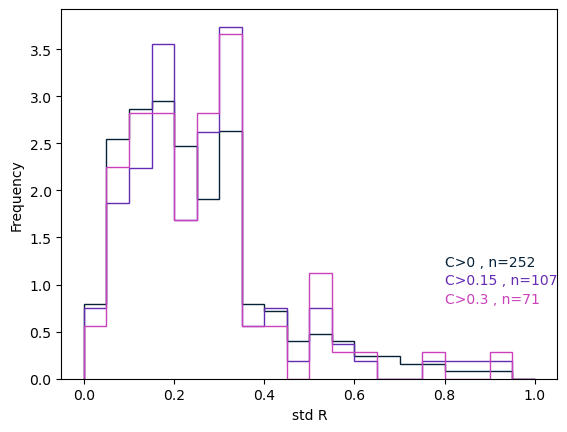

Text(0, 0.5, 'Frequency')

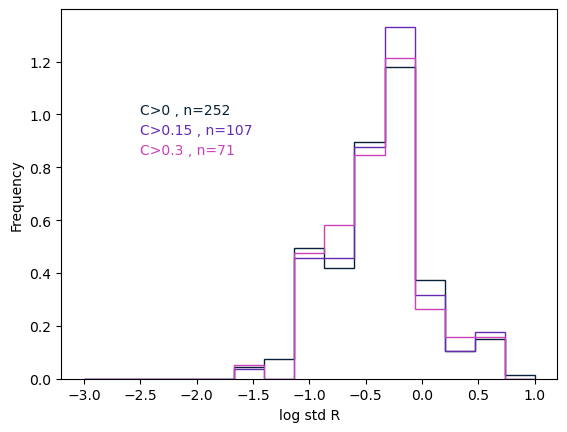

In [7]:
cmap = plt.get_cmap('cmr.bubblegum')
Clim=[0,0.15,0.30]
for ci in range(len(Clim)):
    tstdr=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            tstdr.append(normstdr[i])
    plt.hist(tstdr,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=20,range=(0,1.0))
    plt.text(0.8,1.2-(ci*0.2),'C>'+str(Clim[ci])+' , n='+str(len(tstdr)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'std R')
plt.ylabel('Frequency')

plt.show()
plt.clf()
for ci in range(len(Clim)):
    tstdr=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            tstdr.append(stdr[i])
    plt.hist(np.log10(tstdr),color=cmap((Clim[ci])*2),histtype='step',density=True,bins=15,range=(-3.0,1.0))
    plt.text(-2.5,1.0-(ci*0.075),'C>'+str(Clim[ci])+' , n='+str(len(tstdr)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'log std R')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

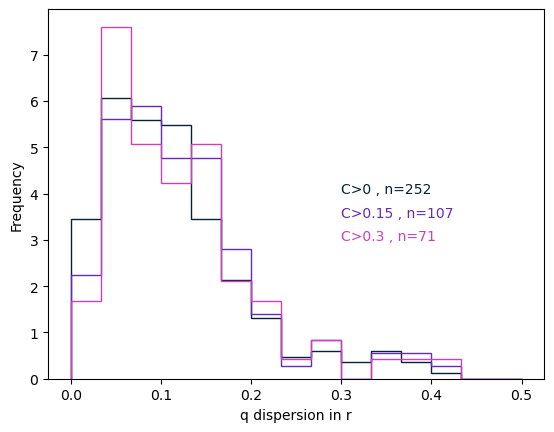

In [8]:
Clim=[0,0.15,0.30]
for ci in range(len(Clim)):
    tqdisr=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            tqdisr.append(qdisr[i])
    plt.hist(tqdisr,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=15,range=(0,0.5))
    plt.text(0.3,4-(ci*0.5),'C>'+str(Clim[ci])+' , n='+str(len(tqdisr)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'q dispersion in r')
plt.ylabel('Frequency')


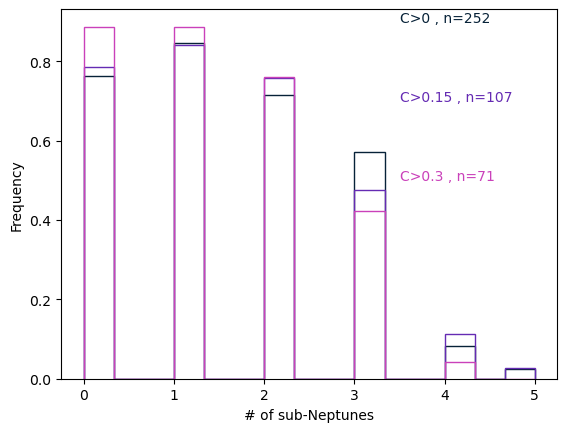

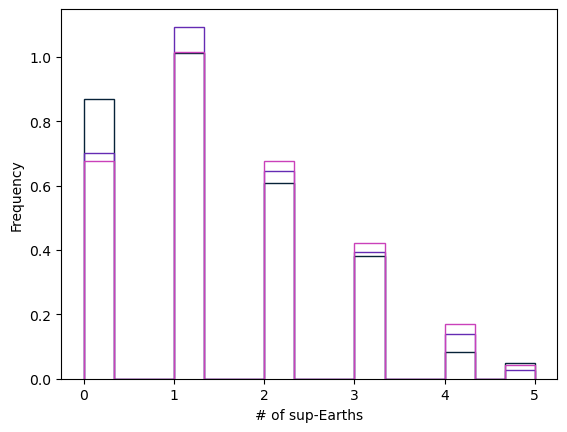

Text(0, 0.5, 'Frequency')

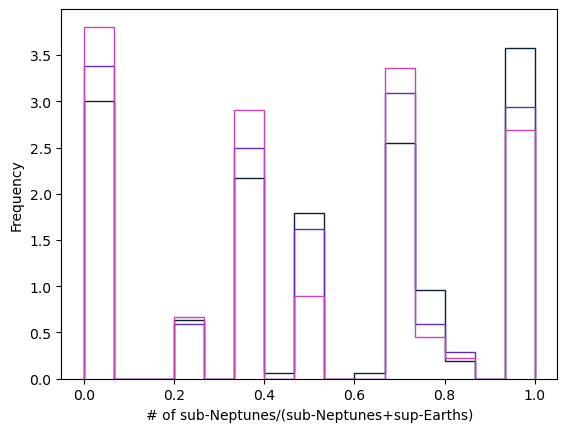

In [9]:
Clim=[0,0.15,0.30]
for ci in range(len(Clim)):
    tsubnep=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            tsubnep.append(subnep[i])
    plt.hist(tsubnep,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=15,range=(0,5))
    plt.text(3.5,0.9-(ci*0.2),'C>'+str(Clim[ci])+' , n='+str(len(tsubnep)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'# of sub-Neptunes')
plt.ylabel('Frequency')

plt.show()
plt.clf()

for ci in range(len(Clim)):
    tsupearth=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            tsupearth.append(supearth[i])
    plt.hist(tsupearth,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=15)
    #plt.text(0.3,4-(ci*0.5),'C>'+str(Clim[ci])+' , n='+str(len(subnep)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'# of sup-Earths')
plt.ylabel('Frequency')

plt.show()
plt.clf()

for ci in range(len(Clim)):
    tratio=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            if (supearth[i]+subnep[i])>0:
                tratio.append(subnep[i]/(supearth[i]+subnep[i]))
    plt.hist(tratio,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=15)
    #plt.text(0.3,4-(ci*0.5),'C>'+str(Clim[ci])+' , n='+str(len(subnep)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'# of sub-Neptunes/(sub-Neptunes+sup-Earths)')
plt.ylabel('Frequency')


Slope=0.7545952091533623
r-value=0.922153473889751


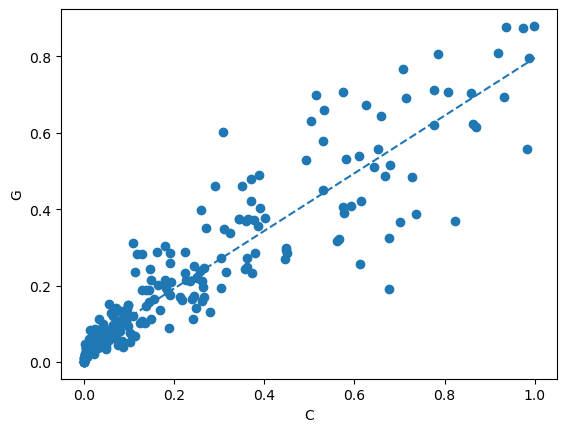

In [10]:
plt.scatter(gapcompl,gini)
b,c,r,p,se=stats.linregress(gapcompl,gini)
xtemp=np.arange(0,1.1,0.1)
plt.plot(xtemp,b*xtemp+c,ls='--')
plt.xlabel('C')
plt.ylabel('G')
print('Slope='+str(b))
print('r-value='+str(r))

Slope=0.458852104102456
r-value=0.8887916206483393


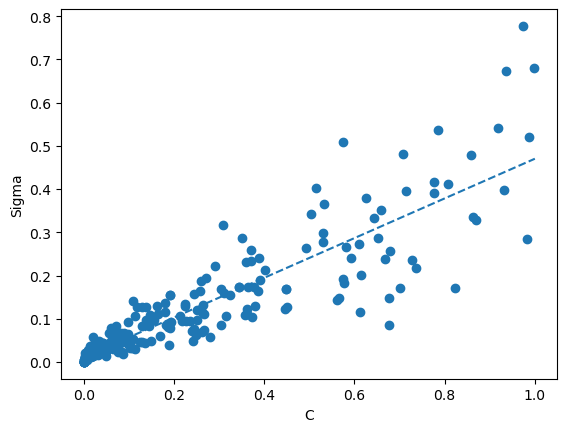

In [11]:
plt.scatter(gapcompl,qdisp)
b,c,r,p,se=stats.linregress(gapcompl,qdisp)
xtemp=np.arange(0,1.1,0.1)
plt.plot(xtemp,b*xtemp+c,ls='--')
plt.xlabel('C')
plt.ylabel('Sigma')
print('Slope='+str(b))
print('r-value='+str(r))

Slope=-0.062035250826672425
r-value=-0.053178023780657176


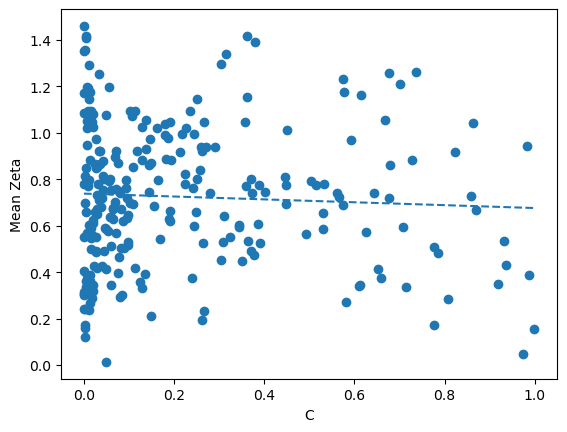

In [12]:
plt.scatter(gapcompl,zeta)
b,c,r,p,se=stats.linregress(gapcompl,zeta)
xtemp=np.arange(0,1.1,0.1)
plt.plot(xtemp,b*xtemp+c,ls='--')
plt.xlabel('C')
plt.ylabel('Mean Zeta')
print('Slope='+str(b))
print('r-value='+str(r))

Slope=-0.3287448321293976
r-value=-0.14548739300953112


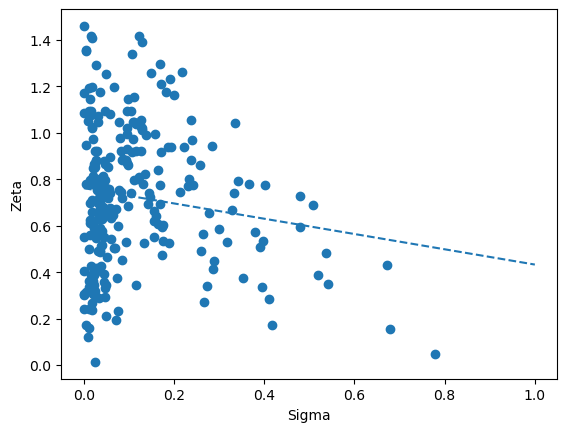

In [13]:
plt.scatter(qdisp,zeta)
b,c,r,p,se=stats.linregress(qdisp,zeta)
xtemp=np.arange(0,1.1,0.1)
plt.plot(xtemp,b*xtemp+c,ls='--')
plt.xlabel('Sigma')
plt.ylabel('Zeta')
print('Slope='+str(b))
print('r-value='+str(r))

In [14]:
plt.hist([i for sublist in zetas for i in sublist],bins=50)
plt.xlabel('Zeta')
plt.show()
plt.close()
plt.hist([i for sublist in rrats for i in sublist],bins=50)
plt.xlabel('R_outer/R_inner')
plt.show()
plt.close()

NameError: name 'zetas' is not defined

In [ ]:
Clim=[0,0.15,0.30]
for ci in range(len(Clim)):
    tzetas=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            for j in zetas[i]:   
                tzetas.append(j)
    plt.hist(tzetas,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=30,range=(0,1.5))
    plt.text(1.4,1-(ci*0.2),'C>'+str(Clim[ci])+' , n='+str(len(tzetas)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'Zetas')
plt.ylabel('Frequency')

NameError: name 'zetas' is not defined

In [ ]:
Clim=[0,0.15,0.30]
for ci in range(len(Clim)):
    trrats=[]
    for i in range(len(gapcompl)):
        if gapcompl[i]>Clim[ci]:
            for j in rrats[i]:   
                trrats.append(j)
    plt.hist(trrats,color=cmap((Clim[ci])*2),histtype='step',density=True,bins=30,range=(0,4))
    plt.text(3,1-(ci*0.2),'C>'+str(Clim[ci])+' , n='+str(len(trrats)),color=cmap((Clim[ci])*2))
    
plt.xlabel(r'R_outer/R_inner')
plt.ylabel('Frequency')

NameError: name 'rrats' is not defined

In [ ]:
import pandas as pd

df = pd.read_csv('Data/threeplanetsystemsinfo_with_res.csv')

#columns_to_keep = ['kepmag', 'rhostar', 'mstar', 'logg', '[M/H]', 'n', 'minper', 
#                   'maxper', 'meanper', 'perrange', 'lograngep', 'normstdp', 'meandpp', 
#                   'gapc', 'gini', 'qdisp', 'meanzeta', 'subearth', 'supearth', 'subnep', 
#                   'nepplus', 'N_first', 'N_second', 'min_abs_delta', 'med_abs_delta']  # all summary stats

#columns_to_keep = ['gapc', 'gini', 'qdisp', 'meanzeta', 'min_abs_delta', 'med_abs_delta']  # select summary stats

#columns_to_keep = ['minper', 'maxper', 'meanper', 'perrange', 'lograngep', 'normstdp', 'meandpp', 
#                   'gapc', 'gini', 'qdisp', 'meanzeta', 'min_abs_delta', 'med_abs_delta']  # sans stellar and discrete

columns_to_keep = ['gapc', 'gini', 'qdisp', '[M/H]', 'normstdp']  # manhandling for a good radius dispersion plot

summary_stats = df[['KOI']+columns_to_keep]
radius_measurements = {}

for i, each in enumerate(df['radius']):
    r_em = df['radius_em'][i]
    r_ep = df['radius_ep'][i]

    radii = [r for r in each.strip('[]').split(' ') if r]
    r_em = [r for r in r_em.strip('[]').split(' ') if r]
    r_ep = [r for r in r_ep.strip('[]').split(' ') if r]

    radii = [float(r) for r in radii]
    r_em = [float(r) for r in r_em]
    r_ep = [float(r) for r in r_ep]

    radius_measurements[str(df['KOI'][i])] = (radii, r_em, r_ep)

summary_stats.head()


,KOI,gapc,gini,qdisp,[M/H],normstdp
0,41,0.181007,0.194061,0.085768,0.098,0.667945
1,70,0.244135,0.252481,0.158293,0.103,1.169489
2,82,0.056318,0.057503,0.035797,0.102,0.545636
3,85,0.676441,0.324268,0.148079,0.122,0.457655
4,94,0.024652,0.087133,0.046480,0.064,0.855645


Group 1:  [1.27, 2.269, 1.528, 0.461, 0.575, 1.177, 2.175, 0.601, 0.833, 1.596, 3.859, 10.242, 6.105, 2.375, 2.265, 2.63, 0.517, 2.522, 1.431, 0.795, 2.384, 1.078, 2.622, 1.585, 1.712, 1.019, 2.996, 1.589, 4.212, 5.077, 3.399, 3.64, 7.102, 2.908, 1.359, 1.742, 2.713, 1.929, 3.009, 3.374, 4.031, 2.638, 3.575, 1.715, 3.031, 2.15, 1.255, 2.356, 1.297, 11.105, 2.163, 2.387, 5.9, 2.298, 2.526, 2.336, 0.869, 2.048, 1.285, 0.345, 0.732, 1.937, 1.811, 2.606, 2.325, 1.777, 1.349, 3.176, 2.741, 2.366, 1.447, 2.522, 2.568, 0.975, 2.655, 6.146, 1.007, 2.889, 1.333, 0.723, 2.04, 0.824, 3.652, 2.47, 2.02, 0.632, 1.48, 1.321, 1.719, 2.536, 10.659, 1.07, 2.186, 0.921, 4.353, 1.757, 3.829, 0.525, 0.77, 2.961, 0.79, 2.495, 3.432, 2.495, 2.249, 1.624, 1.436, 4.198, 2.527, 3.092, 1.459, 1.491, 2.314, 1.282, 2.373, 2.235, 1.66, 2.412, 2.522, 1.531, 1.481, 1.139, 1.414, 1.573, 1.607, 2.596, 2.606, 1.235, 2.714, 2.99, 2.211, 2.272, 2.427, 2.076, 2.399, 2.205, 1.69, 2.483, 1.403, 2.303, 2.104, 1.251, 0.894, 1

/opt/anaconda3/envs/bb/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/yk/2lp5vmnd6s778_4bh__0mvyc0000gp/T/ipykernel_66616/3887365600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_stats['group'] = labels


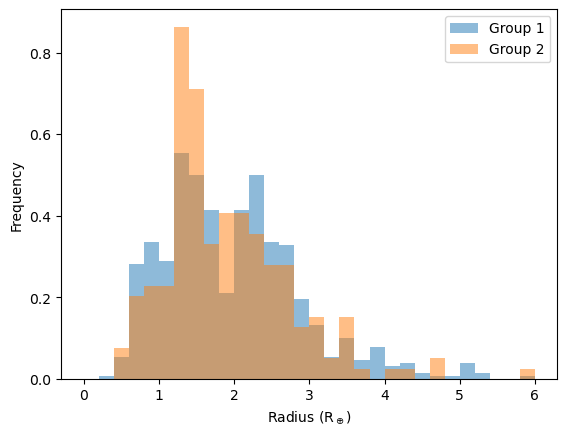

In [112]:
from sklearn.cluster import KMeans
import ast

# Extract the features for clustering

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(summary_stats[columns_to_keep])
labels = kmeans.labels_

# Separate the systems into two groups based on the labels
group1 = summary_stats[labels == 0]
group2 = summary_stats[labels == 1]

# add a group label to the radius dataframe
summary_stats['group'] = labels

# dictionaries of radii for the two groups
system_radii_group1 = {}
system_radii_group2 = {}
# array of radii for the two groups
N = len(labels)

r_group1 = []
r_group2 = []
r_em_group1 = []
r_em_group2 = []
r_ep_group1 = []
r_ep_group2 = []

for i in range(N):
    if labels[i] == 0:

        radii = radius_measurements[str(df['KOI'][i])]
        r = radii[0]
        r_em = np.abs(radii[1])
        r_ep = radii[2]
        system_radii_group1[i] = (r, r_em, r_ep)
        for j in range(len(r)):
            r_group1.append(r[j])
            r_em_group1.append(r_em[j])
            r_ep_group1.append(r_ep[j])
        
    elif labels[i] == 1:
        radii = radius_measurements[str(df['KOI'][i])]
        r = radii[0]
        r_em = np.abs(radii[1])
        r_ep = radii[2]
        system_radii_group2[i] = (r, r_em, r_ep)
        for j in range(len(r)):
            r_group2.append(r[j])
            r_em_group2.append(r_em[j])
            r_ep_group2.append(r_ep[j])

print('Group 1: ', r_group1)
print('Group 2: ', r_group2)


# Plot the radius distributions of the two groups
plt.hist(r_group1, bins=30, alpha=0.5, label='Group 1', range=(0, 6), density=True)
plt.hist(r_group2, bins=30, alpha=0.5, label='Group 2', range=(0, 6), density=True)
plt.xlabel(r'Radius (R$_\oplus$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()






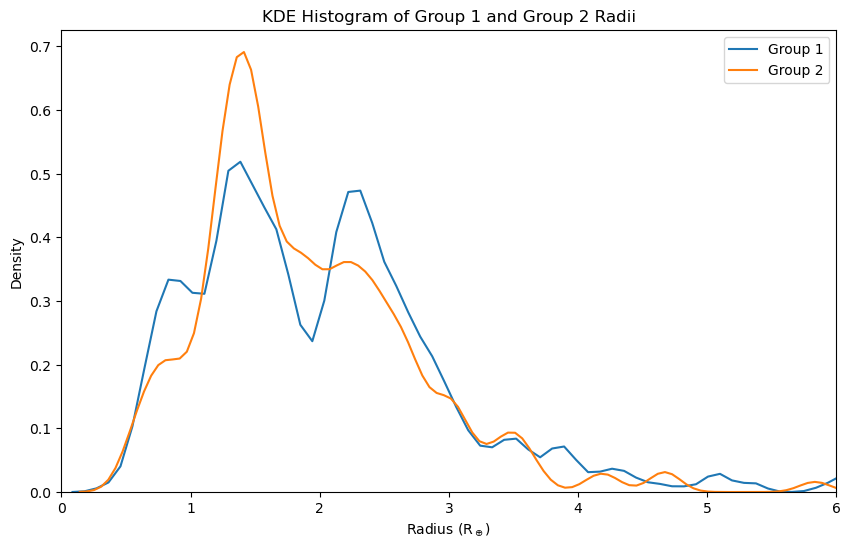

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the KDE histograms
plt.figure(figsize=(10, 6))
sns.kdeplot(r_group1, label='Group 1', bw_adjust=0.2)
sns.kdeplot(r_group2, label='Group 2', bw_adjust=0.2)

# Add labels and legend
plt.xlabel(r'Radius (R$_\oplus$)')
plt.ylabel('Density')
plt.xlim(0, 6)
plt.legend()
plt.title('KDE Histogram of Group 1 and Group 2 Radii')
N = len(columns_to_keep)
plt.savefig('Data/kmeans_r_kde_N%s.svg' %str(N-1), format='svg')
plt.savefig('Data/kmeans_r_kde_N%s.pdf' %str(N-1), format='pdf')
plt.show()

In [114]:
import matplotlib
import sys


print("matplotlib version:", matplotlib.__version__)

print("Python version:", sys.version)
print("Python version info:", sys.version_info)

matplotlib version: 3.7.2
Python version: 3.8.20 | packaged by conda-forge | (default, Sep 30 2024, 17:48:42) 
[Clang 17.0.6 ]
Python version info: sys.version_info(major=3, minor=8, micro=20, releaselevel='final', serial=0)


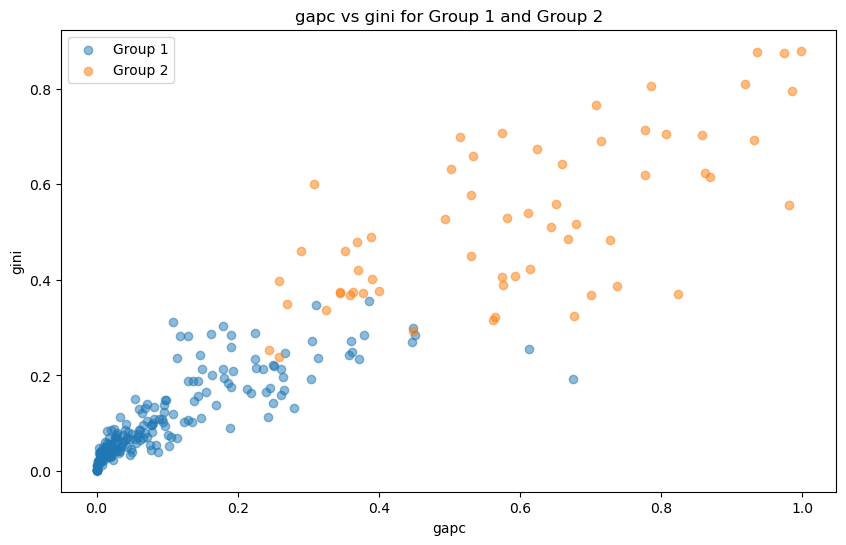

In [115]:
plt.figure(figsize=(10, 6))

# Plot for group 1
plt.scatter(group1['gapc'], group1['gini'], label='Group 1', alpha=0.5)

# Plot for group 2
plt.scatter(group2['gapc'], group2['gini'], label='Group 2', alpha=0.5)

# Add labels and legend
plt.xlabel('gapc')
plt.ylabel('gini')
plt.legend()
plt.title('gapc vs gini for Group 1 and Group 2')
N = len(columns_to_keep)
plt.savefig('Data/kmeans_CvG_N%s.svg' %str(N-1), format='svg')
plt.savefig('Data/kmeans_CvG_N%s.pdf' %str(N-1), format='pdf')
plt.show()

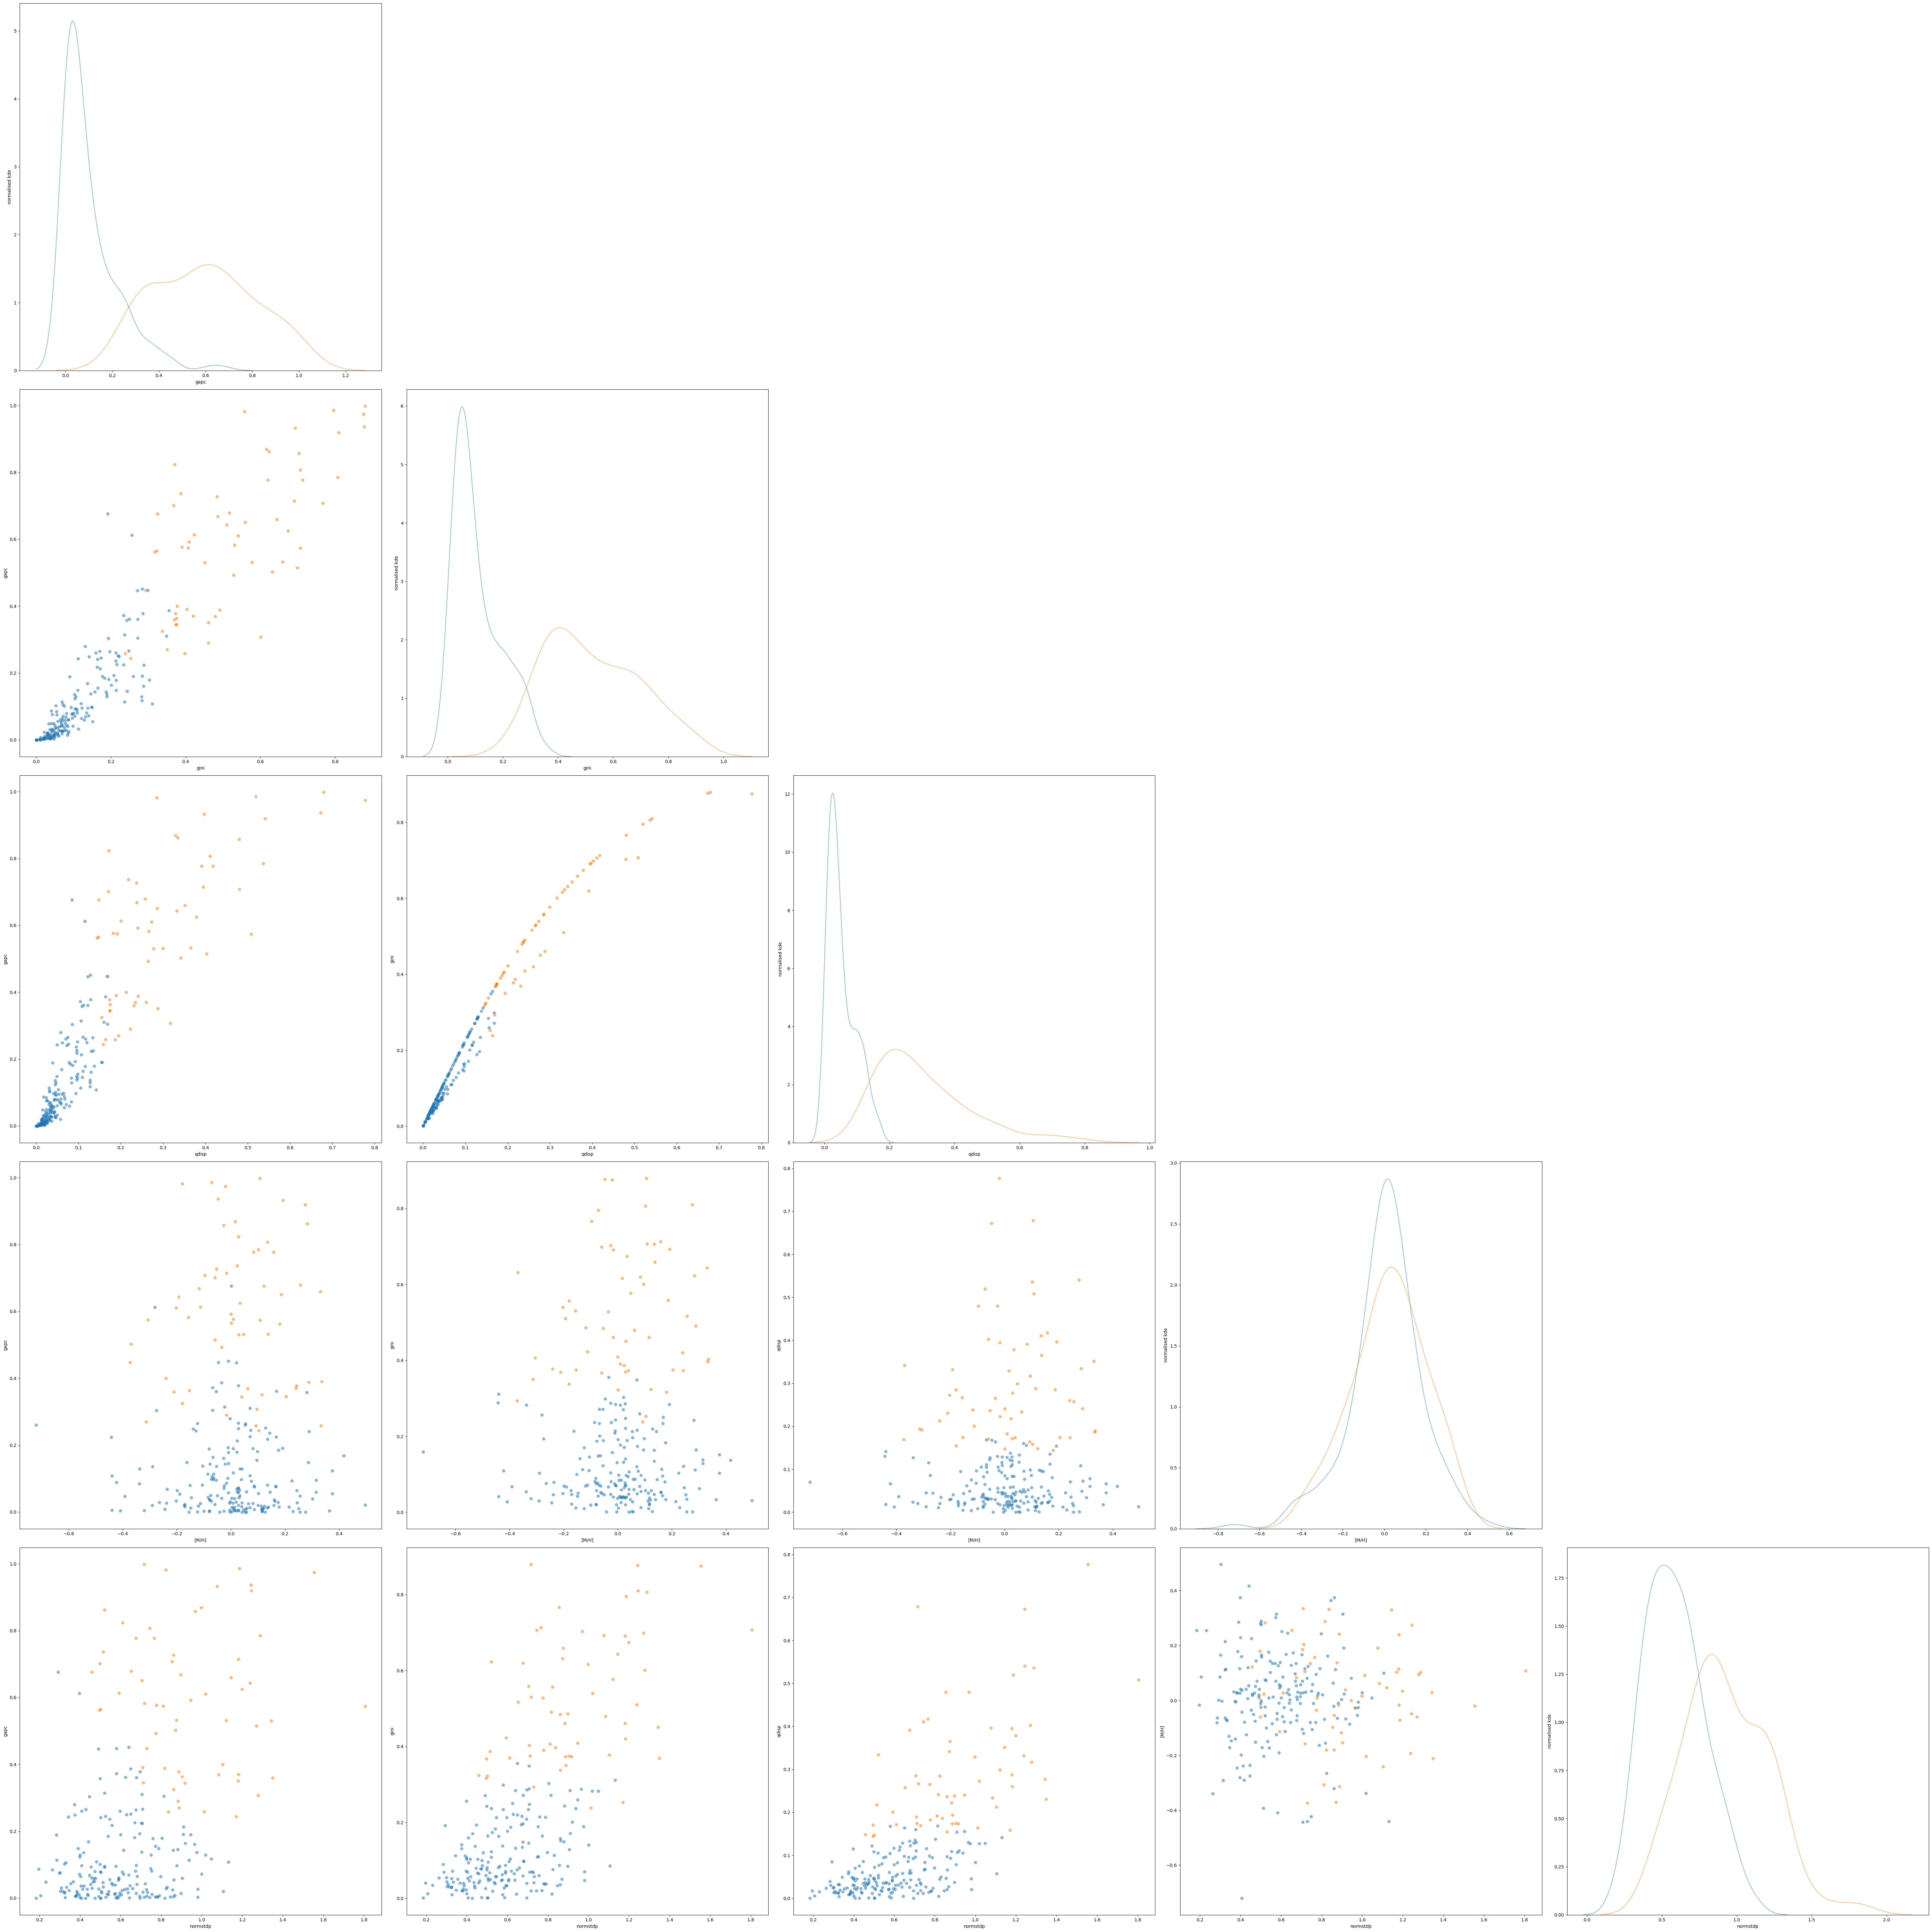

In [116]:
N = len(columns_to_keep)

fig, axes = plt.subplots(N, N, figsize=(60, 60))

# Iterate over each subplot and plot some data
for i in range(N):
    for j in range(N):
        ax=axes[i, j]

        if i<j:
            ax.axis('off')

        if (i>=j):
            I = columns_to_keep[i]
            ax.set_xlabel(I)

        if i == j:
            #histogram
            plt.sca(ax)
            sns.kdeplot(group1[columns_to_keep[i]], label='Group 1', alpha=0.5)
            sns.kdeplot(group2[columns_to_keep[i]], label='Group 2', alpha=0.5)
            plt.ylabel('normalised kde')

        if i>j:
        
            J = columns_to_keep[j]
            ax.set_ylabel(J)

            ax.scatter(group1[I], group1[J], label='Group 1', alpha=0.5)
            ax.scatter(group2[I], group2[J], label='Group 2', alpha=0.5)

# Adjust layout
plt.tight_layout()
N = len(columns_to_keep)
plt.savefig('Data/kmeans_features_N%s.svg' %str(N-1), format='svg')
plt.savefig('Data/kmeans_features_N%s.pdf' %str(N-1), format='pdf')
plt.show()